<div align="center">
  <h1>WORLD HAPPINESS REPORT FOR 2020 & 2021</h1>
</div>


<div style="background-color:#69AAAC; padding: 10px;">
    
# What Makes a Country Happy?
    
### The 2021 World Happiness Report attempts to measure happiness around the world according to the following variables:
    
</div>






* **Ladder score**	: Rank of the country based on the Happiness Score.

* **Logged GDP per capita** :The extent to which GDP contributes to the calculation of the Happiness Score.
* **Social support** :Social support (or having someone to count on in times of trouble) is the national average of the binary responses (either 0)
* **Healthy life expectancy**:Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based on the data extracted from the World
* **Freedom to make life choices** :The extent to which Freedom contributed to the calculation of the Happiness Score.
* **Generosity**:Someone showing generosity is happy to give time, money, food, or kindness to people in need
* **Perceptions of corruption**:the extent to which corruption exists in various domains





In [ ]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from  sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets, linear_model, metrics
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
df20= pd.read_csv('2020.csv')

In [ ]:
df21= pd.read_csv('2021.csv')

In [ ]:
df20.head(100)

Country name            Regional indicator  Ladder score  \
0       Finland                Western Europe        7.8087   
1       Denmark                Western Europe        7.6456   
2   Switzerland                Western Europe        7.5599   
3       Iceland                Western Europe        7.5045   
4        Norway                Western Europe        7.4880   
..          ...                           ...           ...   
95     Bulgaria    Central and Eastern Europe        5.1015   
96      Morocco  Middle East and North Africa        5.0948   
97     Cameroon            Sub-Saharan Africa        5.0849   
98    Venezuela   Latin America and Caribbean        5.0532   
99      Algeria  Middle East and North Africa        5.0051   

    Standard error of ladder score  upperwhisker  lowerwhisker  \
0                         0.031156      7.869766      7.747634   
1                         0.033492      7.711245      7.579955   
2                         0.035014      7.628528      7.491272   
3                         0.059616      7.621347      7.387653   
4                         0.034837      7.556281      7.419719   
..                             ...           ...           ...   
95                        0.044221      5.188173      5.014827   
96                        0.055650      5.203875      4.985725   
97                        0.067296      5.216800      4.953000   
98                        0.064281      5.179190      4.927210   
99                        0.044236      5.091802      4.918397   

    Logged GDP per capita  Social support  Healthy life expectancy  \
0               10.639267        0.954330                71.900825   
1               10.774001        0.955991                72.402504   
2               10.979933        0.942847                74.102448   
3               10.772559        0.974670                73.000000   
4               11.087804        0.952487                73.200783   
..                    ...             ...                      ...   
95               9.869319        0.937840                66.803978   
96               8.940313        0.592628                65.896240   
97               8.118648        0.700386                52.704941   
98               8.977794        0.890408                66.505341   
99               9.537965        0.803385                65.905174   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
0                       0.949172   -0.059482                   0.195445   
1                       0.951444    0.066202                   0.168489   
2                       0.921337    0.105911                   0.303728   
3                       0.948892    0.246944                   0.711710   
4                       0.955750    0.134533                   0.263218   
..                           ...         ...                        ...   
95                      0.745178   -0.143908                   0.935585   
96                      0.772072   -0.240377                   0.815725   
97                      0.763052   -0.001496                   0.851337   
98                      0.623278   -0.169091                   0.837038   
99                      0.466611   -0.121105                   0.735485   

    Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                   1.972317                          1.285190   
1                   1.972317                          1.326949   
2                   1.972317                          1.390774   
3                   1.972317                          1.326502   
4                   1.972317                          1.424207   
..                       ...                               ...   
95                  1.972317                          1.046555   
96                  1.972317                          0.758622   
97                  1.972317                          0.503958   
98                  1.972317                       

In [ ]:
df21.head(100)

Country name                  Regional indicator  Ladder score  \
0        Finland                      Western Europe         7.842   
1        Denmark                      Western Europe         7.620   
2    Switzerland                      Western Europe         7.571   
3        Iceland                      Western Europe         7.554   
4    Netherlands                      Western Europe         7.464   
..           ...                                 ...           ...   
95         Niger                  Sub-Saharan Africa         5.074   
96  Turkmenistan  Commonwealth of Independent States         5.066   
97        Gambia                  Sub-Saharan Africa         5.051   
98         Benin                  Sub-Saharan Africa         5.045   
99          Laos                      Southeast Asia         5.030   

    Standard error of ladder score  upperwhisker  lowerwhisker  \
0                            0.032         7.904         7.780   
1                            0.035         7.687         7.552   
2                            0.036         7.643         7.500   
3                            0.059         7.670         7.438   
4                            0.027         7.518         7.410   
..                             ...           ...           ...   
95                           0.102         5.273         4.875   
96                           0.036         5.136         4.996   
97                           0.089         5.225         4.877   
98                           0.073         5.189         4.901   
99                           0.045         5.119         4.941   

    Logged GDP per capita  Social support  Healthy life expectancy  \
0                  10.775           0.954                   72.000   
1                  10.933           0.954                   72.700   
2                  11.117           0.942                   74.400   
3                  10.878           0.983                   73.000   
4                  10.932           0.942                   72.400   
..                    ...             ...                      ...   
95                  7.098           0.641                   53.780   
96                  9.629           0.983                   62.409   
97                  7.686           0.690                   55.160   
98                  8.087           0.489                   54.713   
99                  8.947           0.728                   58.968   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
0                          0.949      -0.098                      0.186   
1                          0.946       0.030                      0.179   
2                          0.919       0.025                      0.292   
3                          0.955       0.160                      0.673   
4                          0.913       0.175                      0.338   
..                           ...         ...                        ...   
95                         0.806       0.018                      0.693   
96                         0.877       0.273                      0.888   
97                         0.697       0.424                      0.746   
98                         0.757      -0.034                      0.661   
99                         0.910       0.123                      0.658   

    Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                       2.43                             1.446   
1                       2.43                             1.502   
2                       2.43                             1.566   
3                       2.43                             1.482   
4                       2.43                             1.501   
..                       ...                               ...   
95                      2.43                             0.162   
96                      2.43                             1.046   
97                      2.43      

**info 2020.csv**

In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

**2020 info**

In [ ]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

**2020_describtion**






In [ ]:
df20.describe().T

count       mean           std  \
Ladder score                                153.0   5.473240  1.112270e+00   
Standard error of ladder score              153.0   0.053538  1.818302e-02   
upperwhisker                                153.0   5.578175  1.096823e+00   
lowerwhisker                                153.0   5.368304  1.128631e+00   
Logged GDP per capita                       153.0   9.295706  1.201588e+00   
Social support                              153.0   0.808721  1.214533e-01   
Healthy life expectancy                     153.0  64.445529  7.057848e+00   
Freedom to make life choices                153.0   0.783360  1.177863e-01   
Generosity                                  153.0  -0.014568  1.518088e-01   
Perceptions of corruption                   153.0   0.733120  1.751724e-01   
Ladder score in Dystopia                    153.0   1.972317  1.559417e-15   
Explained by: Log GDP per capita            153.0   0.868771  3.724157e-01   
Explained by: Social support                153.0   1.155607  2.868656e-01   
Explained by: Healthy life expectancy       153.0   0.692869  2.540935e-01   
Explained by: Freedom to make life choices  153.0   0.463583  1.411725e-01   
Explained by: Generosity                    153.0   0.189375  1.004011e-01   
Explained by: Perceptions of corruption     153.0   0.130718  1.130966e-01   
Dystopia + residual                         153.0   1.972317  5.636378e-01   

                                                  min        25%        50%  \
Ladder score                                 2.566900   4.724100   5.515000   
Standard error of ladder score               0.025902   0.040698   0.050606   
upperwhisker                                 2.628270   4.826248   5.607728   
lowerwhisker                                 2.505530   4.603149   5.430644   
Logged GDP per capita                        6.492642   8.350645   9.456313   
Social support                               0.319460   0.737217   0.829204   
Healthy life expectancy                     45.200001  58.961712  66.305145   
Freedom to make life choices                 0.396573   0.714839   0.799805   
Generosity                                  -0.300907  -0.127015  -0.033665   
Perceptions of corruption                    0.109784   0.683019   0.783122   
Ladder score in Dystopia                     1.972317   1.972317   1.972317   
Explained by: Log GDP per capita             0.000000   0.575862   0.918549   
Explained by: Social support                 0.000000   0.986718   1.203987   
Explained by: Healthy life expectancy        0.000000   0.495443   0.759818   
Explained by: Freedom to make life choices   0.000000   0.381457   0.483293   
Explained by: Generosity                     0.000000   0.115006   0.176745   
Explained by: Perceptions of corruption      0.000000   0.055805   0.098435   
Dystopia + residual                          0.257241   1.629928   2.046272   

                                                  75%        max  
Ladder score                                 6.228500   7.808700  
Standard error of ladder score               0.060677   0.120590  
upperwhisker                                 6.363886   7.869766  
lowerwhisker                                 6.138881   7.747634  
Logged GDP per capita                       10.265124  11.450681  
Social support                               0.906747   0.974670  
Healthy life expectancy                     69.289192  76.804581  
Freedom to make life choices                 0.877709   0.974998  
Generosity                                   0.085429   0.560664  
Perceptions of corruption                    0.849151   0.935585  
Ladder score in Dystopia                     1.972317   1.972317  
Explained by: Log GDP per capita             1.169229   1.536676  
Explained by: Social support                 1.387139   1.547567  
Explained by: Healthy life expectancy        0.867249   1.137814  
Explained by: Freedom to make life choices   0.576665 

**decribtion_2021**

In [ ]:
df21.describe().T

count       mean           std  \
Ladder score                                149.0   5.532839  1.073924e+00   
Standard error of ladder score              149.0   0.058752  2.200120e-02   
upperwhisker                                149.0   5.648007  1.054330e+00   
lowerwhisker                                149.0   5.417631  1.094879e+00   
Logged GDP per capita                       149.0   9.432208  1.158601e+00   
Social support                              149.0   0.814745  1.148890e-01   
Healthy life expectancy                     149.0  64.992799  6.762043e+00   
Freedom to make life choices                149.0   0.791597  1.133318e-01   
Generosity                                  149.0  -0.015134  1.506567e-01   
Perceptions of corruption                   149.0   0.727450  1.792263e-01   
Ladder score in Dystopia                    149.0   2.430000  5.347044e-15   
Explained by: Log GDP per capita            149.0   0.977161  4.047399e-01   
Explained by: Social support                149.0   0.793315  2.588713e-01   
Explained by: Healthy life expectancy       149.0   0.520161  2.130191e-01   
Explained by: Freedom to make life choices  149.0   0.498711  1.378884e-01   
Explained by: Generosity                    149.0   0.178047  9.827033e-02   
Explained by: Perceptions of corruption     149.0   0.135141  1.143614e-01   
Dystopia + residual                         149.0   2.430329  5.376452e-01   

                                               min     25%     50%     75%  \
Ladder score                                 2.523   4.852   5.534   6.255   
Standard error of ladder score               0.026   0.043   0.054   0.070   
upperwhisker                                 2.596   4.991   5.625   6.344   
lowerwhisker                                 2.449   4.706   5.413   6.128   
Logged GDP per capita                        6.635   8.541   9.569  10.421   
Social support                               0.463   0.750   0.832   0.905   
Healthy life expectancy                     48.478  59.802  66.603  69.600   
Freedom to make life choices                 0.382   0.718   0.804   0.877   
Generosity                                  -0.288  -0.126  -0.036   0.079   
Perceptions of corruption                    0.082   0.667   0.781   0.845   
Ladder score in Dystopia                     2.430   2.430   2.430   2.430   
Explained by: Log GDP per capita             0.000   0.666   1.025   1.323   
Explained by: Social support                 0.000   0.647   0.832   0.996   
Explained by: Healthy life expectancy        0.000   0.357   0.571   0.665   
Explained by: Freedom to make life choices   0.000   0.409   0.514   0.603   
Explained by: Generosity                     0.000   0.105   0.164   0.239   
Explained by: Perceptions of corruption      0.000   0.060   0.101   0.174   
Dystopia + residual                          0.648   2.138   2.509   2.794   

                                               max  
Ladder score                                 7.842  
Standard error of ladder score               0.173  
upperwhisker                                 7.904  
lowerwhisker                                 7.780  
Logged GDP per capita                       11.647  
Social support                               0.983  
Healthy life expectancy                     76.953  
Freedom to make life choices                 0.970  
Generosity                                   0.542  
Perceptions of corruption                    0.939  
Ladder score in Dystopia                     2.430  
Explained by: Log GDP per capita             1.751  
Explained by: Social support                 1.172  
Explained by: Healthy life expectancy        0.897  
Explained by: Freedom to make life choices   0.716  
Explained by: Generosity                     0.541  
Explained by: Perceptions of corruption      0.547  
Dystopia + residual                          3.482

**Catgeorial and continoues columns 20**

In [ ]:
print('Catgeorial Columns are : ')

for i in df20.columns:
    if df20[i].dtype == 'O':
        print(i)

Catgeorial Columns are : 
Country name
Regional indicator


In [ ]:
print('Continuous Columns are : ')

for i in df20.columns:
    if df20[i].dtype != 'O':
        print(i)

Continuous Columns are : 
Ladder score
Standard error of ladder score
upperwhisker
lowerwhisker
Logged GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption
Ladder score in Dystopia
Explained by: Log GDP per capita
Explained by: Social support
Explained by: Healthy life expectancy
Explained by: Freedom to make life choices
Explained by: Generosity
Explained by: Perceptions of corruption
Dystopia + residual


**Catgeorial and continoues columns 21**

In [ ]:
print('Catgeorial Columns are : ')

for i in df21.columns:
    if df21[i].dtype == 'O':
        print(i)

Catgeorial Columns are : 
Country name
Regional indicator


In [ ]:
print('Continuous Columns are : ')

for i in df21.columns:
    if df21[i].dtype != 'O':
        print(i)

Continuous Columns are : 
Ladder score
Standard error of ladder score
upperwhisker
lowerwhisker
Logged GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption
Ladder score in Dystopia
Explained by: Log GDP per capita
Explained by: Social support
Explained by: Healthy life expectancy
Explained by: Freedom to make life choices
Explained by: Generosity
Explained by: Perceptions of corruption
Dystopia + residual


**check duplicates**

In [ ]:
df20[df20.duplicated()]

Empty DataFrame
Columns: [Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual]
Index: []

**Top 10 countries for each attribute 20**


<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Country name'>

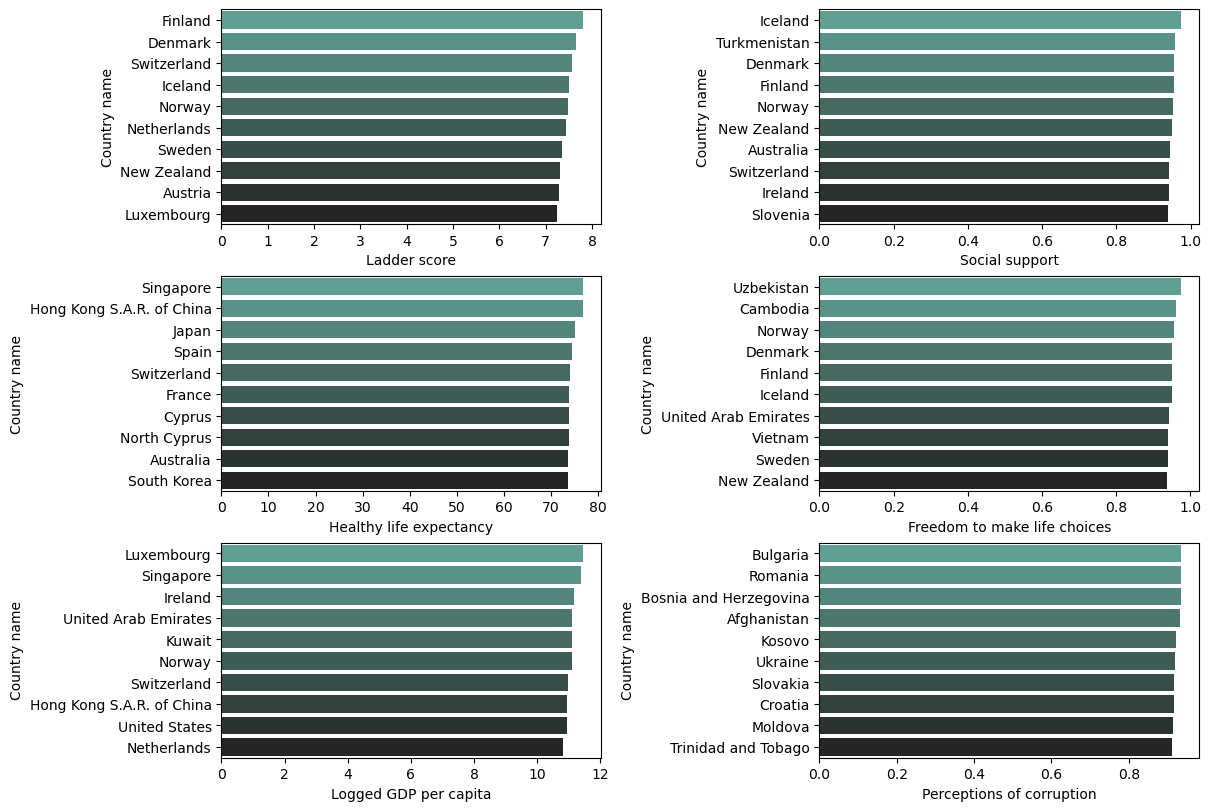

In [ ]:
#Attribute by attribute analysis
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(12,8))

sns.barplot(y="Country name", x="Ladder score", data=df20.nlargest(10,"Ladder score"),palette="dark:#5A9_r",ax=axes[0,0])

sns.barplot(y="Country name", x="Social support", data=df20.nlargest(10,"Social support"),palette="dark:#5A9_r", ax=axes[0,1])

sns.barplot(y="Country name", x="Healthy life expectancy", data=df20.nlargest(10,"Healthy life expectancy"),palette="dark:#5A9_r", ax=axes[1,0])

sns.barplot(y="Country name", x="Freedom to make life choices", data=df20.nlargest(10,"Freedom to make life choices"),palette="dark:#5A9_r", ax=axes[1,1])

sns.barplot(y="Country name", x="Logged GDP per capita", data=df20.nlargest(10,"Logged GDP per capita"),palette="dark:#5A9_r",ax=axes[2,0])

sns.barplot(y="Country name", x="Perceptions of corruption", data=df20.nlargest(10,"Perceptions of corruption"),palette="dark:#5A9_r",ax= axes[2,1])

**Top 10 countries for each attribute 21**

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Country name'>

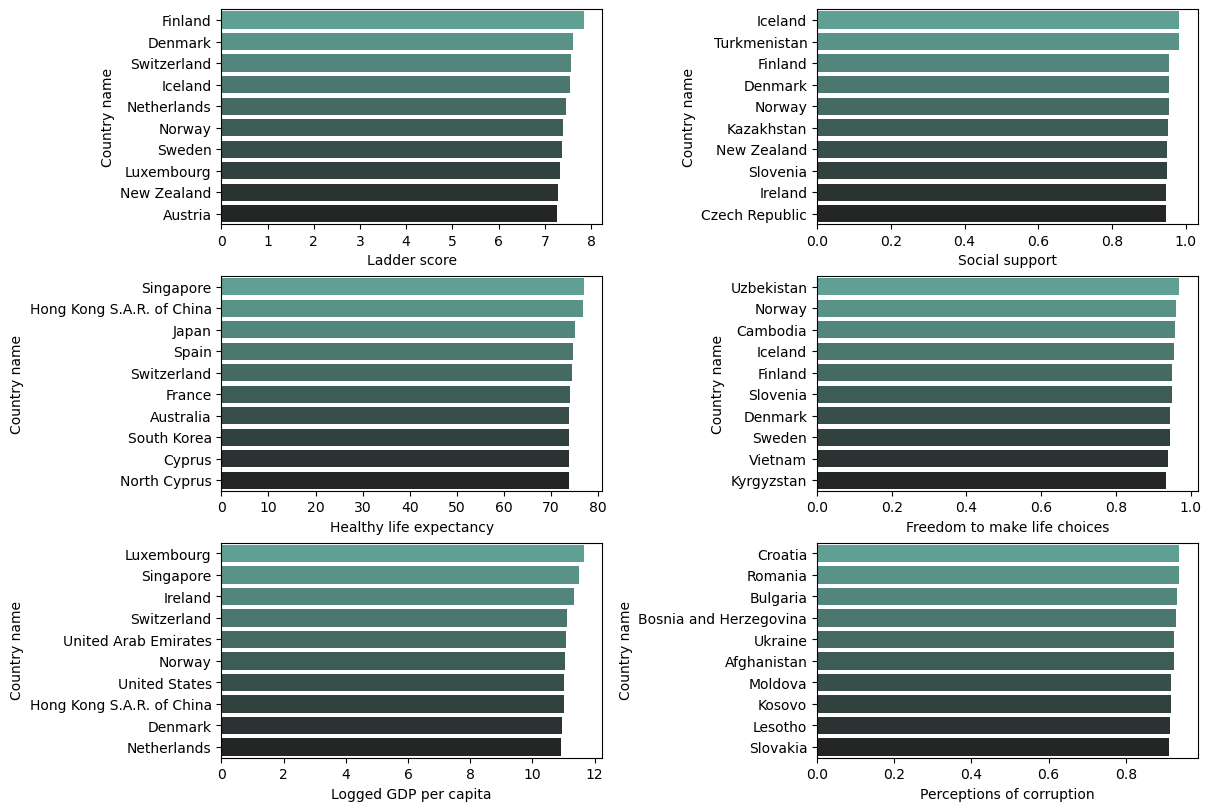

In [ ]:
#Attribute by attribute analysis
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(12,8))

sns.barplot(y="Country name", x="Ladder score", data=df21.nlargest(10,"Ladder score"),palette="dark:#5A9_r",ax=axes[0,0])

sns.barplot(y="Country name", x="Social support", data=df21.nlargest(10,"Social support"),palette="dark:#5A9_r", ax=axes[0,1])

sns.barplot(y="Country name", x="Healthy life expectancy", data=df21.nlargest(10,"Healthy life expectancy"), palette="dark:#5A9_r",ax=axes[1,0])

sns.barplot(y="Country name", x="Freedom to make life choices", data=df21.nlargest(10,"Freedom to make life choices"), palette="dark:#5A9_r",ax=axes[1,1])

sns.barplot(y="Country name", x="Logged GDP per capita", data=df21.nlargest(10,"Logged GDP per capita"),palette="dark:#5A9_r",ax=axes[2,0])

sns.barplot(y="Country name", x="Perceptions of corruption", data=df21.nlargest(10,"Perceptions of corruption"),palette="dark:#5A9_r",ax= axes[2,1])

**Generosity for each Regional indicator 2020**

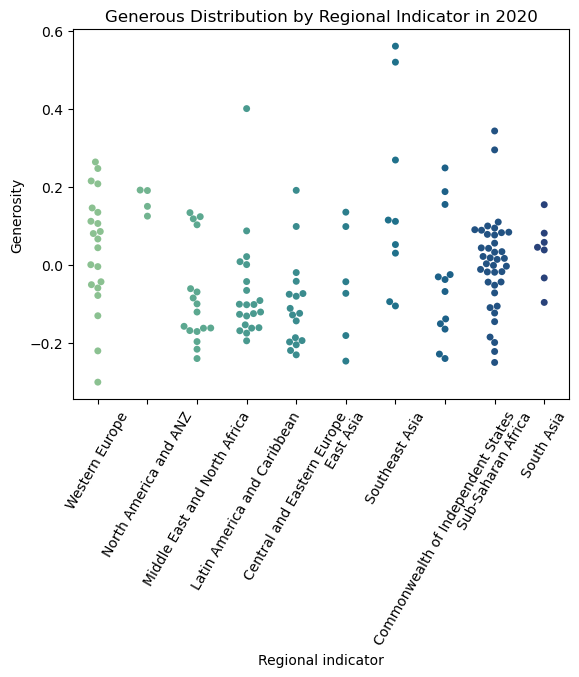

In [ ]:
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = df20,palette="crest")
plt.xticks(rotation = 60)
plt.title("Generous Distribution by Regional Indicator in 2020")
plt.show()

**Generosity for each Regional indicator 2021**

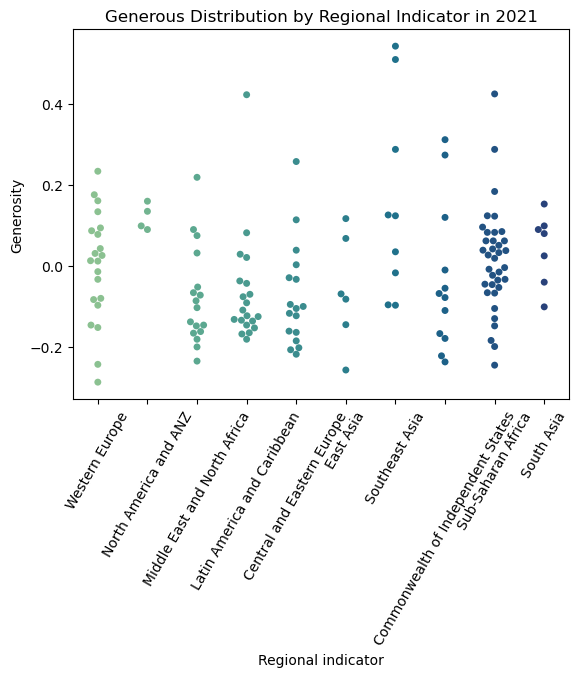

In [ ]:
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = df21,palette="crest")
plt.xticks(rotation = 60)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

**Percentange of Average of Regions 2020**

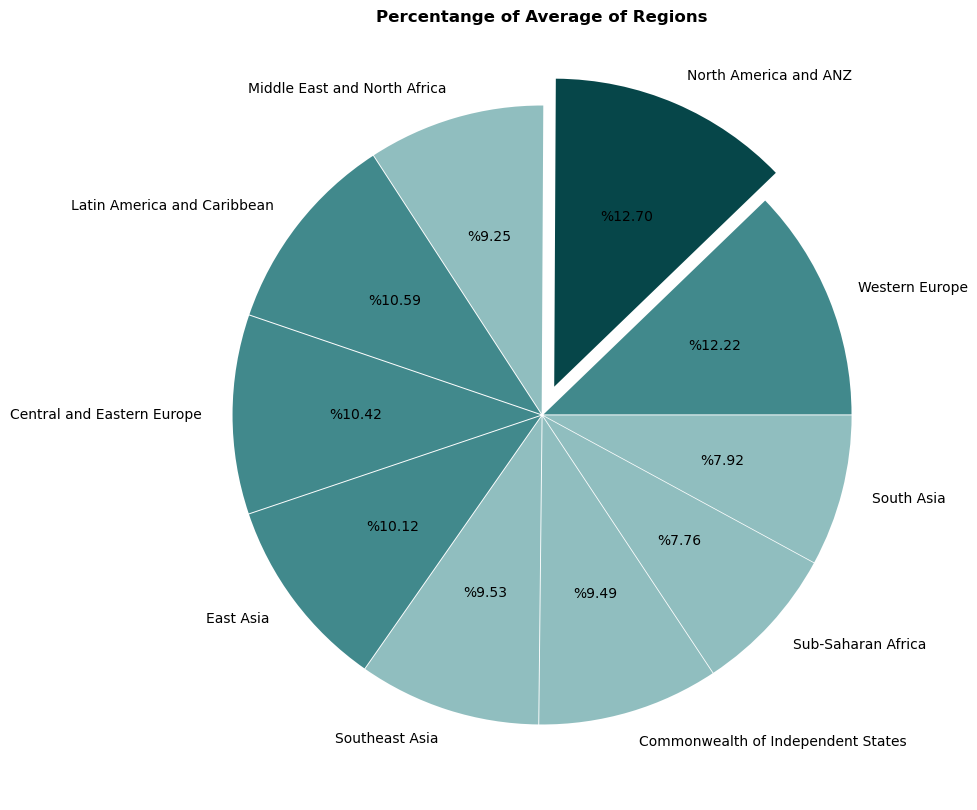

In [ ]:
region_avg = {}
for var in df20["Regional indicator"].unique():
    avgg = df20[df20["Regional indicator"] == var]["Ladder score"].mean()
    region_avg[var] = avgg

regions = list(region_avg.keys())
avg_happiness = list(region_avg.values())

plt.figure(figsize=(10, 10))
colors = ["#064649" if i==max(avg_happiness) else "#41898c" if i > 5.5 else "#90BEBF" for i in avg_happiness]
plt.pie(avg_happiness, labels=regions, autopct="%%%.2f",
        explode=[.1 if avg == max(avg_happiness) else .005
                 for avg in list(region_avg.values())],colors=colors)
plt.title("Percentange of Average of Regions", weight="bold")

plt.show()

**Percentange of Average of Regions 2021**

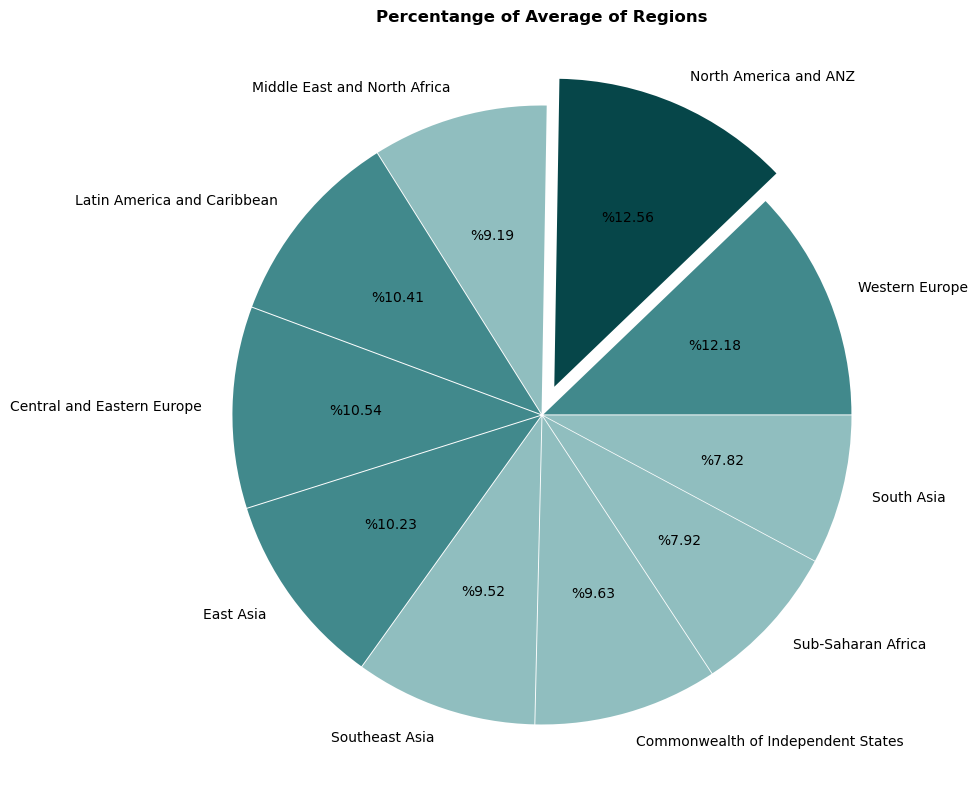

In [ ]:
region_avg = {}
for var in df21["Regional indicator"].unique():
    avgg = df21[df21["Regional indicator"] == var]["Ladder score"].mean()
    region_avg[var] = avgg

regions = list(region_avg.keys())
avg_happiness = list(region_avg.values())

plt.figure(figsize=(10, 10))

colors = ["#064649" if i==max(avg_happiness) else "#41898c" if i > 5.5 else "#90BEBF" for i in avg_happiness]
plt.pie(avg_happiness, labels=regions, autopct="%%%.2f",
        explode=[.1 if avg == max(avg_happiness) else .005
                 for avg in list(region_avg.values())],colors=colors)
plt.title("Percentange of Average of Regions", weight="bold")

plt.show()

**Regional indicator 2020**

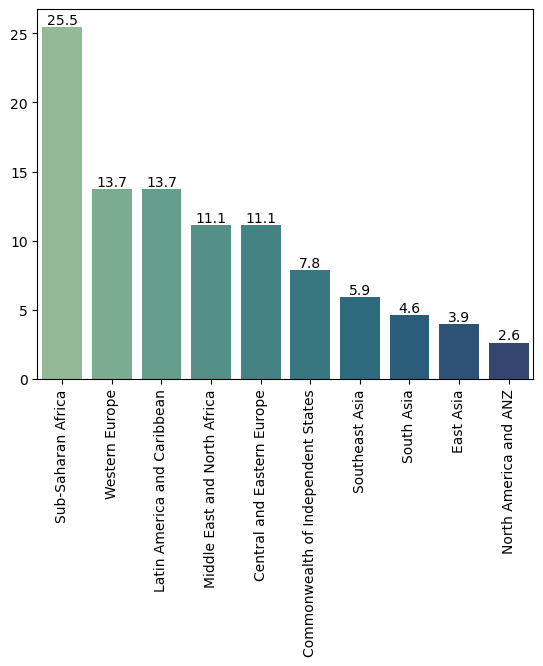

In [ ]:
value = df20['Regional indicator'].value_counts(normalize=True)*100
sns_plot = sns.barplot(x=value.index,y=value.values,palette="crest")
plt.xticks(rotation=90)
for i,v in enumerate(value.values):
    sns_plot.text(i, v, f"{v:.1f}", ha='center', va='bottom')

plt.show()

**Regional indicator 2021**

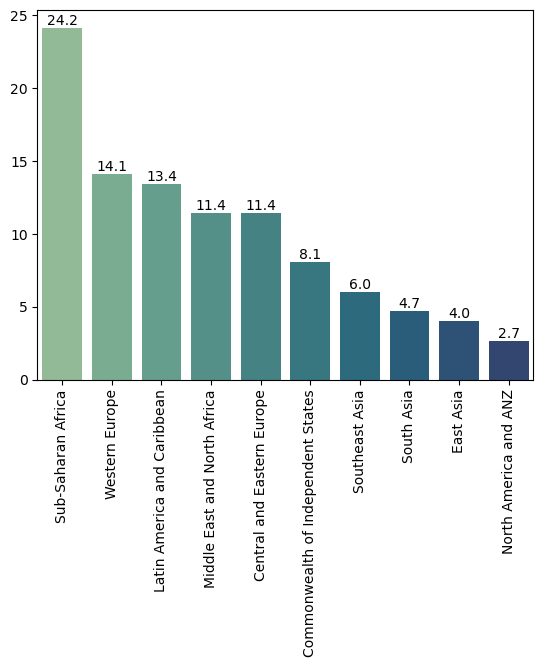

In [ ]:
value = df21['Regional indicator'].value_counts(normalize=True)*100
sns_plot = sns.barplot(x=value.index,y=value.values,palette="crest")
plt.xticks(rotation=90)
for i,v in enumerate(value.values):
    sns_plot.text(i, v, f"{v:.1f}", ha='center', va='bottom')
plt.show()

In [ ]:
def top_10(variable):
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.bar(df20['Country'][:10],df[variable][:10])
    plt.xticks(rotation = 90)
    plt.ylabel(variable)
    plt.title("Analysis of the Top 10 Countries Analysis")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.bar(df20['Country'][-10:],df[variable][-10:])
    plt.xticks(rotation = 90)
    plt.ylabel(variable)
    plt.title("Analysis of the Last 10 Country Analysis")
    plt.grid()

    plt.tight_layout()
    plt.show()

**Geographical Visualization of Happiness Score 2020**

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
data = dict(type='choropleth',
            locations = df20["Country name"],
            locationmode = 'country names',
            z = df20["Ladder score"],
            text = df20["Country name"],
             colorscale = "teal",
            colorbar = {"title":"Happiness Score"})

layout = dict(title = "Geographical Visualization of Happiness Score",
              geo = dict(showframe = True, projection = {"type" : "azimuthal equal area"}))

happiness_map = go.Figure(data = [data], layout=layout)
iplot(happiness_map)

**Geographical Visualization of Happiness Score 2021**

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
data = dict(type='choropleth',
            locations = df21["Country name"],
            locationmode = 'country names',
            z = df21["Ladder score"],
            text = df21["Country name"],
            colorscale = "teal",
            colorbar = {"title":"Happiness Score"})

layout = dict(title = "Geographical Visualization of Happiness Score",
              geo = dict(showframe = True, projection = {"type" : "azimuthal equal area"}))

happiness_map = go.Figure(data = [data], layout=layout)
iplot(happiness_map)

In [ ]:
fig = px.pie(values=df20.groupby('Regional indicator').count()['Country name'].sort_values().values, names=df20.groupby('Regional indicator').count()['Country name'].sort_values().index, title = 'Number Of Indicators Present According To Geographical Area', color_discrete_sequence=px.colors.sequential.Teal)
fig.show()

**Top 10 Changed Countries 2020_2021**

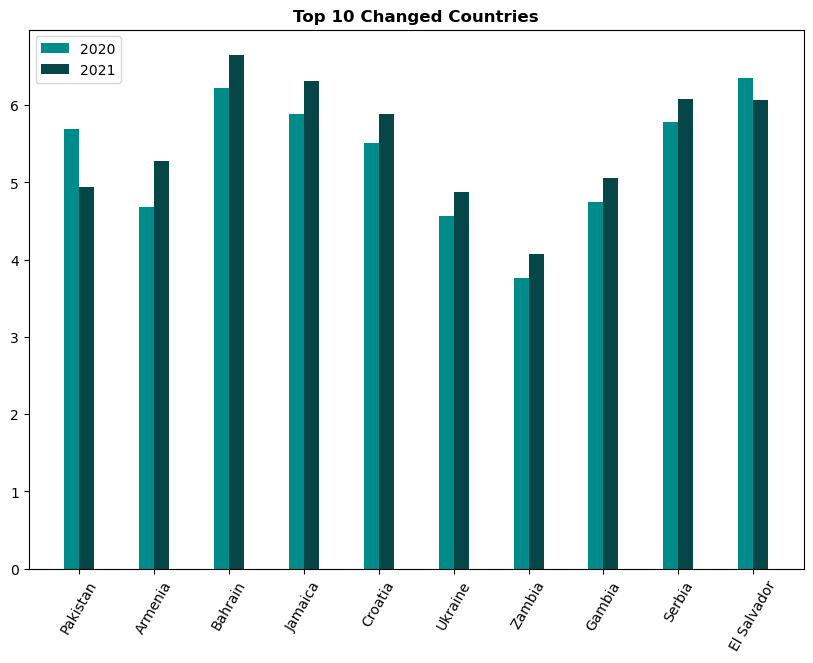

In [ ]:
happiness_change = {}
for country in df20["Country name"]:
    try:
        happiness_20 = df20.set_index("Country name").loc[country, "Ladder score"]
        happiness_21 = df21.set_index("Country name").loc[country, "Ladder score"]
        change = happiness_20 - happiness_21
        happiness_change[country] = change

    except:
        continue
top_10_changed_countries = [x for x in zip(list(happiness_change.keys()), list(happiness_change.values()))]
top_10_changed_countries.sort(key=lambda x: -abs(x[1]))
top_10_changed_countries =  top_10_changed_countries[:10]
top_10_changed_countries

countries = [each[0] for each in top_10_changed_countries]
scores_20 = [df20.set_index("Country name").loc[country,"Ladder score"] for country in countries]
scores_21 = [df21.set_index("Country name").loc[country,"Ladder score"] for country in countries]


plt.figure(figsize=(10, 7))
plt.grid(False)

x = np.arange(10)
width = .2

plt.bar(x-.1,scores_20 , width, label="2020",color ="darkcyan")
plt.bar(x+.1,scores_21, width, label="2021",color= "#064649")

plt.legend()
plt.xticks(x, countries, rotation=60)
plt.title("Top 10 Changed Countries", weight="bold")
plt.show()

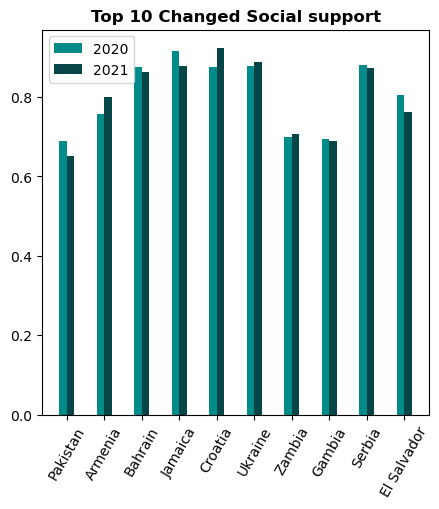

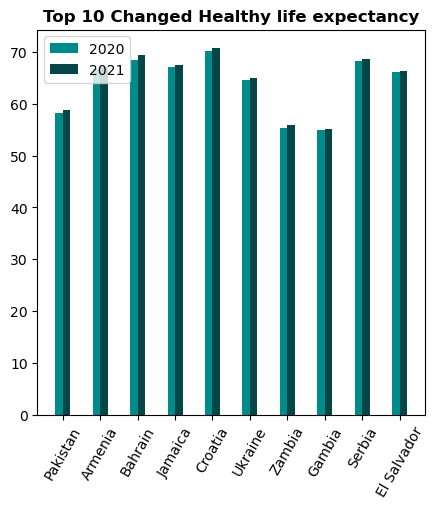

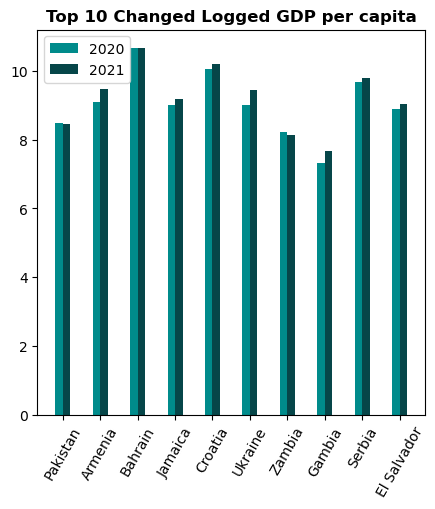

In [ ]:
happiness_change = {}
for country in df20["Country name"]:
    try:
        happiness_20 = df20.set_index("Country name").loc[country, "Ladder score"]
        happiness_21 = df21.set_index("Country name").loc[country, "Ladder score"]
        change = happiness_20 - happiness_21
        happiness_change[country] = change

    except:
        continue
top_10_changed_countries = [x for x in zip(list(happiness_change.keys()), list(happiness_change.values()))]
top_10_changed_countries.sort(key=lambda x: -abs(x[1]))
top_10_changed_countries =  top_10_changed_countries[:10]
top_10_changed_countries

countries = [each[0] for each in top_10_changed_countries]
scores_20 = [df20.set_index("Country name").loc[country,"Social support"] for country in countries]
scores_21 = [df21.set_index("Country name").loc[country,"Social support"] for country in countries]
plt.figure(figsize=(5, 5))
plt.grid(False)

x = np.arange(10)
width = .2

plt.bar(x-.1,scores_20 , width, label="2020",color ="darkcyan")
plt.bar(x+.1,scores_21, width, label="2021",color= "#064649")

plt.legend()
plt.xticks(x, countries, rotation=60)
plt.title("Top 10 Changed Social support", weight="bold")
plt.show()


countries = [each[0] for each in top_10_changed_countries]
scores_20 = [df20.set_index("Country name").loc[country,"Healthy life expectancy"] for country in countries]
scores_21 = [df21.set_index("Country name").loc[country,"Healthy life expectancy"] for country in countries]

plt.figure(figsize=(5, 5))
plt.grid(False)

x = np.arange(10)
width = .2

plt.bar(x-.1,scores_20 , width, label="2020",color ="darkcyan")
plt.bar(x+.1,scores_21, width, label="2021",color= "#064649")

plt.legend()
plt.xticks(x, countries, rotation=60)
plt.title("Top 10 Changed Healthy life expectancy", weight="bold")
plt.show()



countries = [each[0] for each in top_10_changed_countries]
scores_20 = [df20.set_index("Country name").loc[country,"Logged GDP per capita"] for country in countries]
scores_21 = [df21.set_index("Country name").loc[country,"Logged GDP per capita"] for country in countries]

plt.figure(figsize=(5, 5))
plt.grid(False)

x = np.arange(10)
width = .2

plt.bar(x-.1,scores_20 , width, label="2020",color ="darkcyan")
plt.bar(x+.1,scores_21, width, label="2021",color= "#064649")

plt.legend()
plt.xticks(x, countries, rotation=60)
plt.title("Top 10 Changed Logged GDP per capita", weight="bold")
plt.show()

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Country name'>

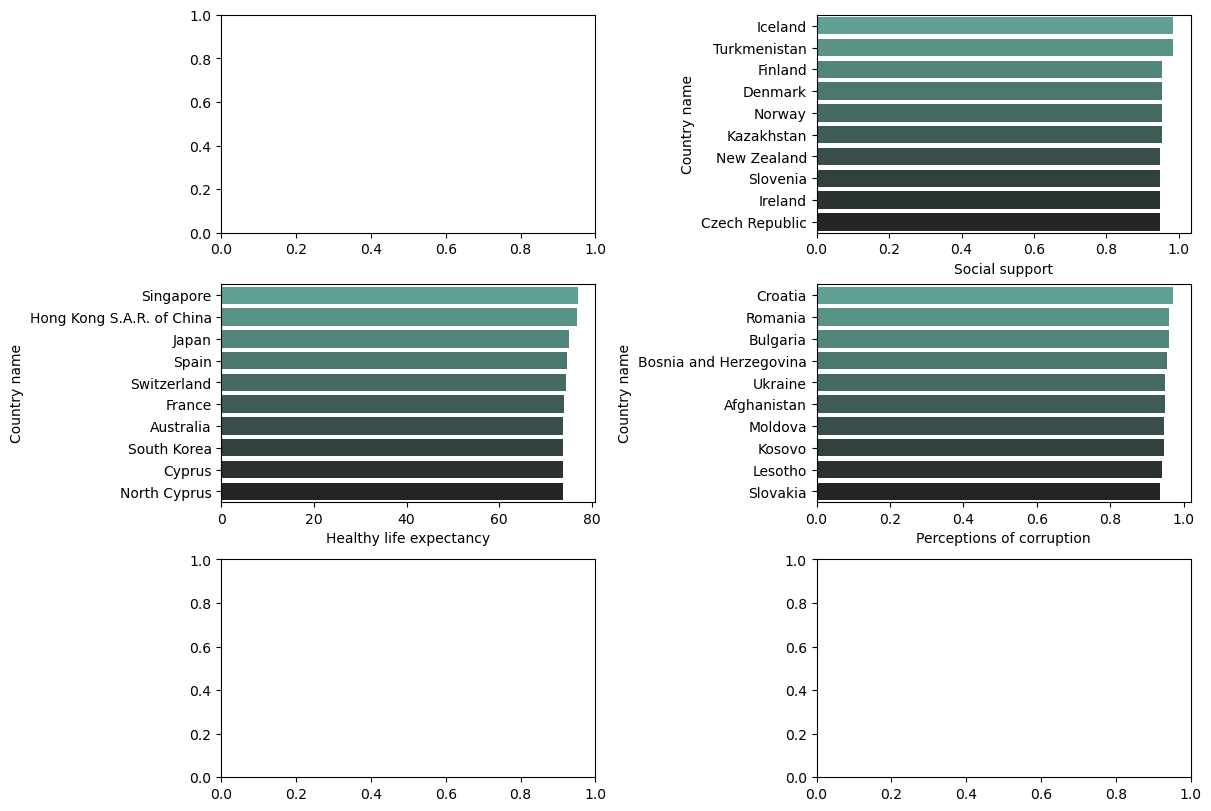

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(12,8))
sns.barplot(y="Country name", x="Social support", data=df21.nlargest(10,"Social support"),palette="dark:#5A9_r", ax=axes[0,1])

sns.barplot(y="Country name", x="Healthy life expectancy", data=df21.nlargest(10,"Healthy life expectancy"), palette="dark:#5A9_r",ax=axes[1,0])

sns.barplot(y="Country name", x="Freedom to make life choices", data=df21.nlargest(10,"Freedom to make life choices"), palette="dark:#5A9_r",ax=axes[1,1])
sns.barplot(y="Country name", x="Perceptions of corruption", data=df21.nlargest(10,"Perceptions of corruption"), palette="dark:#5A9_r",ax=axes[1,1])

**Most countries are from sub-saharan Africa**




In [ ]:
fig = px.bar(x = df20.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Ladder score'].index, y = df20.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Ladder score'].values, height=400, title = 'Ladder scores for five happiest regions', labels = {'x': 'Region Name', 'y' : 'Ladder Score'}, color_discrete_sequence=px.colors.qualitative.D3)
fig.update_traces(marker_color='#176568')

**The happiest region so far are the countries that are located in North America and ANZ**

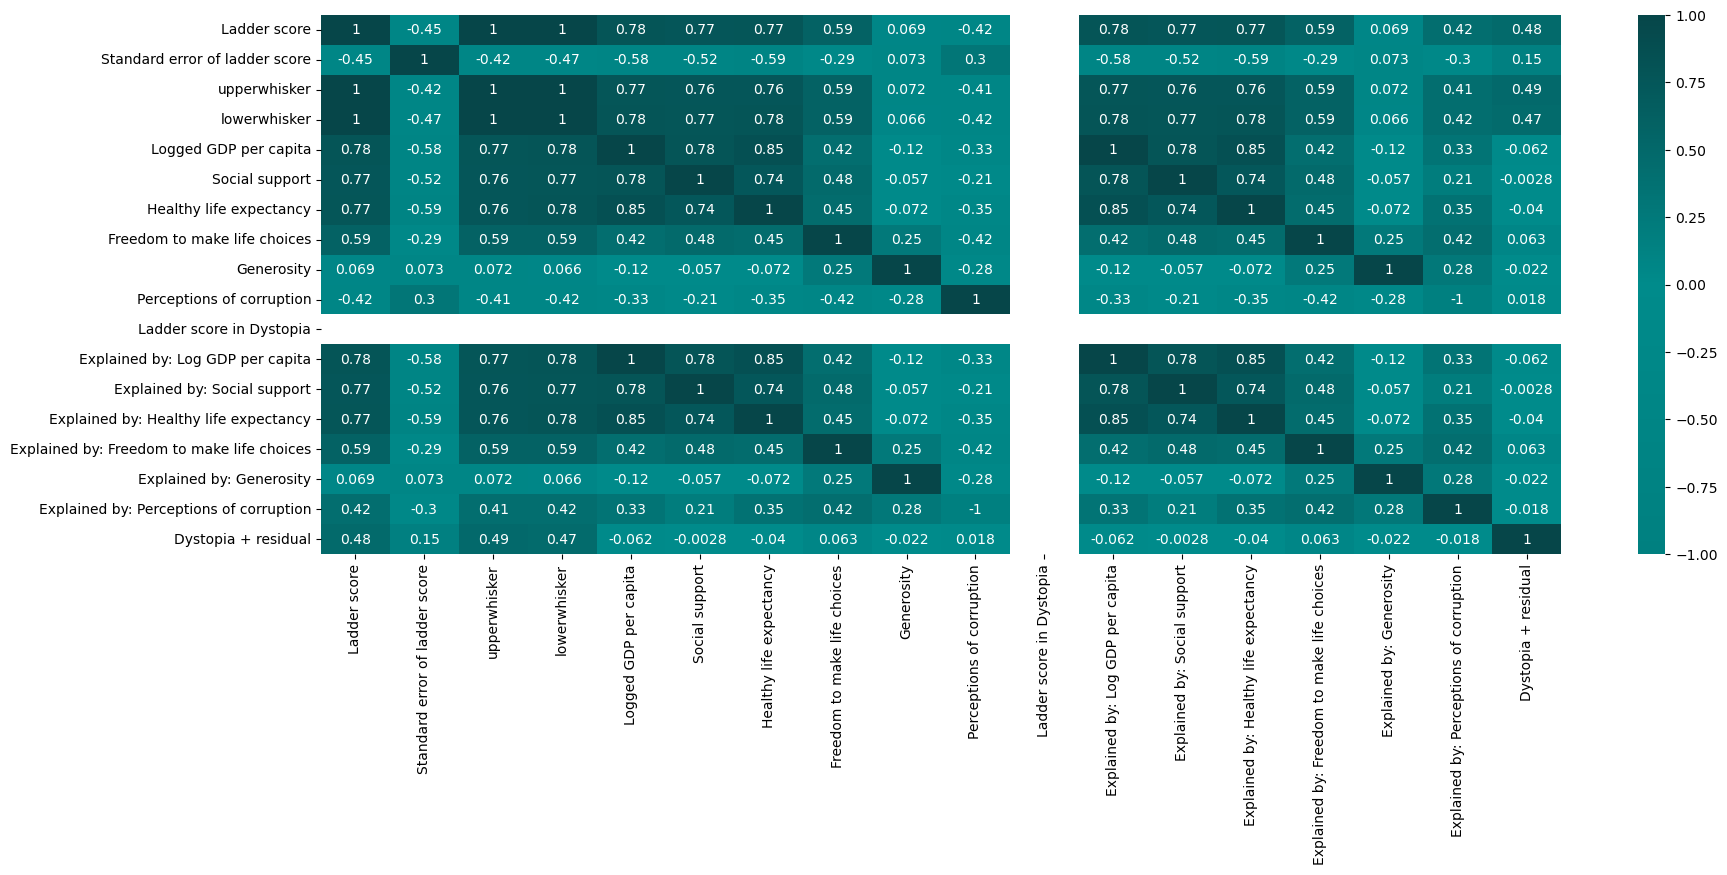

In [ ]:
plt.figure(figsize = (20, 7))
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['teal', 'darkcyan', '#064649'])
sns.heatmap(df20.corr(), annot=True , cmap =cmap);

* **upperwhisker and lowerwhisker columns have a strong effect on the
happiness score**
* **Logged GDP per capita ,Social support and  Healthy life expectancy also have a very high correlation with the ladder score**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distributional data of Happiness_Score')

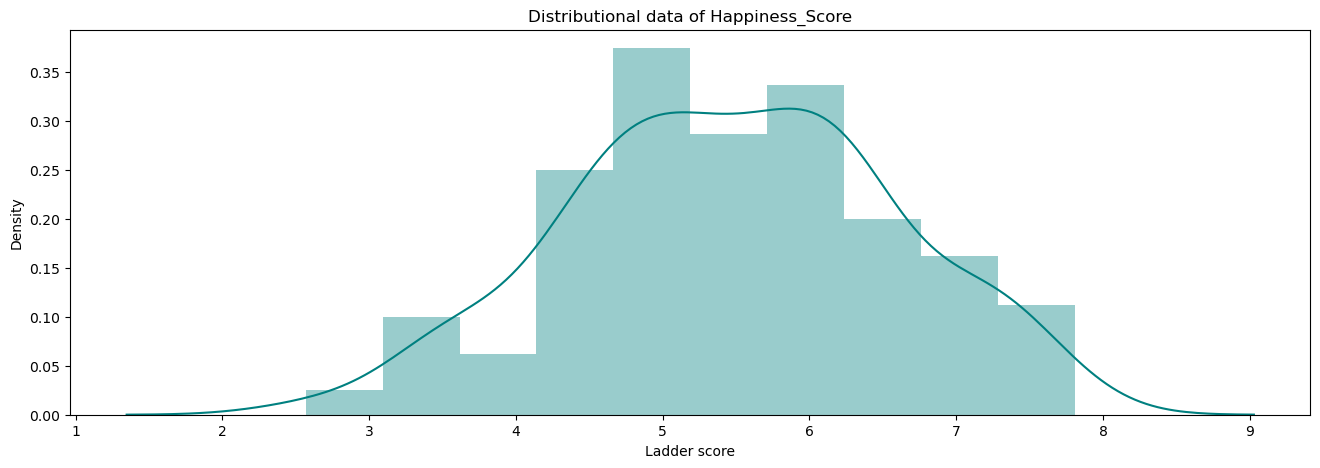

In [ ]:
f2, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df20["Ladder score"], color="Teal",ax = axes)
plt.title("Distributional data of Happiness_Score")

**Countplot of Happiness Country by Happiness Score**

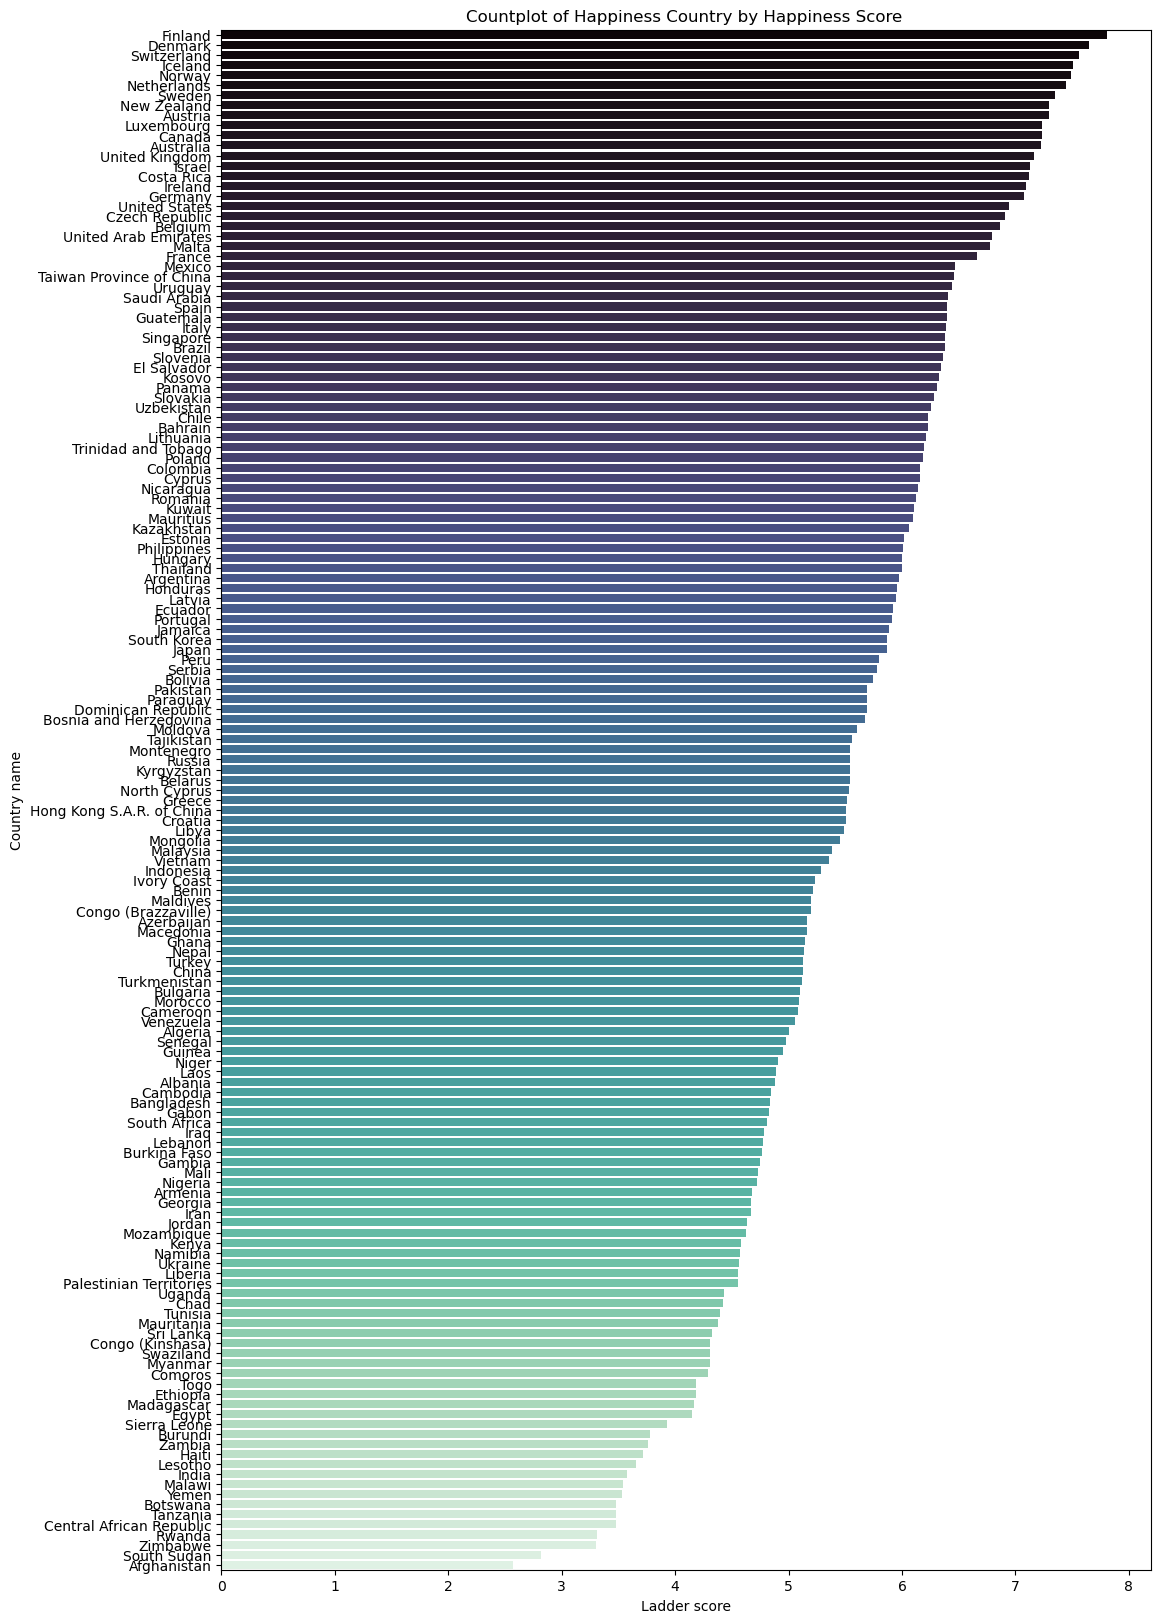

In [ ]:
Happiness_c= df20.sort_values(by='Ladder score', ascending=False)[:100]
figure = plt.figure(figsize=(12,20))
sns.barplot(y=df20['Country name'], x=df20['Ladder score'],palette="mako")
plt.xticks()
plt.xlabel('Ladder score')
plt.ylabel('Country name')
plt.title('Countplot of Happiness Country by Happiness Score ')
plt.show()

In [ ]:
#sns.pairplot(df20,hue='Ladder score',palette='mako')

In [ ]:
lcols = [0,1,2,6,7,8,9,10,11]
df20 = df20.iloc[:, lcols]
df21 = df21.iloc[:, lcols]

df20['Year'] = 2020
df21['Year'] = 2021

df = pd.concat([df21, df20])
df.rename(columns={'Country name': 'Country',
                   'Regional indicator': 'Region',
                   'Ladder score': 'Happiness score'}, inplace=True)
#Feature Engineering: The code creates a new column called all and assigns it an empty string.
df['all'] = ''
# display(df)

#Data Cleaning and Wrangling: df20 & df21 create two new dataframes, df20 and df21, by filtering the original dataframe df based on the Year column.
df20 = df[df.Year == 2020]
df21 = df[df.Year == 2021]
# display(df20)

# create long df

dfM = df.melt(id_vars=['Country',
                       'Region',
                       'Year'],
              value_vars=df.columns[2:-2],
              var_name='Var', value_name='Value')
dfM['all'] = ''

In [ ]:
dfall = dfM.pivot(index=['Country', 'Region'], columns=['Var', 'Year'], values='Value').reset_index()

scorecols = df.columns[2:-2]
for col in scorecols:
    dfall[(col, '% Ch')] = ((dfall[(col, 2021)] - dfall[(col, 2020)])/dfall[(col, 2020)])*100
# display(dfall.sort_index(axis=1))

dfdiff = dfall[['Country', 'Region']].join(dfall.loc[:, pd.IndexSlice[:, '% Ch']])
# display(dfdiff)

dfdiff.columns = dfdiff.columns.to_flat_index().str.join(' ').str.rstrip(' ')
dfdiff.dropna(inplace=True)
# display(dfdiff)

# create long %change df

dfdiffM = dfdiff.melt(id_vars = dfdiff.columns[0:2],
                      value_vars = dfdiff.columns[2:],
                      var_name='Var', value_name='Value'
                     )
dfdiffM['all'] = ''

# add feature
dfdiffM['% Change'] = dfdiffM.apply(lambda row: 'Positive' if row.Value > 0
                                  else 'Negative',
                                  axis=1)
# display(dfdiffM)

**A pivot table showing the values of both years in all attributes**

In [ ]:
display(dfall.sort_index(axis=1))

Var       Country Freedom to make life choices                   Generosity  \
Year                                      2020   2021       % Ch       2020   
0     Afghanistan                     0.396573  0.382  -3.674735  -0.096429   
1         Albania                     0.781994  0.785   0.384373  -0.042309   
2         Algeria                     0.466611  0.480   2.869434  -0.121105   
3       Argentina                     0.831132  0.828  -0.376885  -0.194914   
4         Armenia                     0.712018  0.825  15.867884  -0.138780   
..            ...                          ...    ...        ...        ...   
149     Venezuela                     0.623278  0.615  -1.328190  -0.169091   
150       Vietnam                     0.939593  0.940   0.043321  -0.094533   
151         Yemen                     0.599920  0.602   0.346667  -0.157735   
152        Zambia                     0.806500  0.782  -3.037849   0.078037   
153      Zimbabwe                     0.711458  0.677  -4.843281  -0.072064   

Var                    Happiness score                    ...  \
Year   2021       % Ch            2020   2021       % Ch  ...   
0    -0.102   5.776869          2.5669  2.523  -1.710235  ...   
1    -0.030 -29.093920          4.8827  5.117   4.798575  ...   
2    -0.067 -44.676182          5.0051  4.887  -2.359589  ...   
3    -0.182  -6.625421          5.9747  5.929  -0.764892  ...   
4    -0.168  21.055247          4.6768  5.283  12.961860  ...   
..      ...        ...             ...    ...        ...  ...   
149  -0.169  -0.053527          5.0532  4.892  -3.190053  ...   
150  -0.098   3.667138          5.3535  5.411   1.074066  ...   
151  -0.147  -6.805977          3.5274  3.658   3.702443  ...   
152   0.061 -21.832080          3.7594  4.073   8.341760  ...   
153  -0.047 -34.780153          3.2992  3.145  -4.673862  ...   

Var  Logged GDP per capita                  Perceptions of corruption         \
Year                  2020   2021      % Ch                      2020   2021   
0                 7.462861  7.695  3.110596                  0.933687  0.924   
1                 9.417931  9.520  1.083777                  0.896304  0.901   
2                 9.537965  9.342 -2.054577                  0.735485  0.752   
3                 9.810955  9.962  1.539554                  0.842010  0.834   
4                 9.100476  9.487  4.247291                  0.773545  0.629   
..                     ...    ...       ...                       ...    ...   
149               8.977794  9.073  1.060464                  0.837038  0.827   
150               8.809546  8.973  1.855425                  0.796421  0.796   
151               7.759683  7.578 -2.341367                  0.800288  0.800   
152               8.224720  8.145 -0.969273                  0.801290  0.823   
153               7.865712  7.943  0.982598                  0.810237  0.821   

Var                                          Region Social support         \
Year       % Ch                                               2020   2021   
0     -1.037452                          South Asia       0.470367  0.463   
1      0.523962          Central and Eastern Europe       0.671070  0.697   
2      2.245438        Middle East and North Africa       0.803385  0.802   
3     -0.951277         Latin America and Caribbean       0.900568  0.898   
4    -18.686027  Commonwealth of Independent States       0.757479  0.799   
..          ...                                 ...            ...    ...   
149   -1.199276         Latin America and Caribbean       0.890408  0.861   
150   -0.052890                      Southeast Asia       0.849987  0.850   
151   -0.035953        Middle East and North Africa       0.817981  0.832   
152    2.709422                  Sub-Saharan Africa       0.698824  0.708   
153    1.328378                  Sub-Saharan Africa       0.763093  0.750   

Var             
Year      % Ch  
0    -1.566214  
1     3.863908  
2    -0.172413 

**a map that show the values of the happiness factors among all countries in 2021**

In [ ]:
data = dfM[dfM.Year == 2021]
fig = px.choropleth(data, locations='Country', locationmode='country names',
                    color='Value',
                    animation_frame = 'Var',
                    basemap_visible=False,
                    color_continuous_scale='Teal',
                    title=('Values from 2021 Report')
                   )
fig.update_layout(height=600)
fig.show()

**a map that show the values of the happiness factors among all countries in 2020**

In [ ]:
data = dfM[dfM.Year == 2020]
fig = px.choropleth(data, locations='Country', locationmode='country names',
                    color='Value',
                    animation_frame = 'Var',
                    basemap_visible=False,
                    color_continuous_scale='Teal',
                    title=('Values from 2020 Report')
                   )
fig.update_layout(height=600)
fig.show()

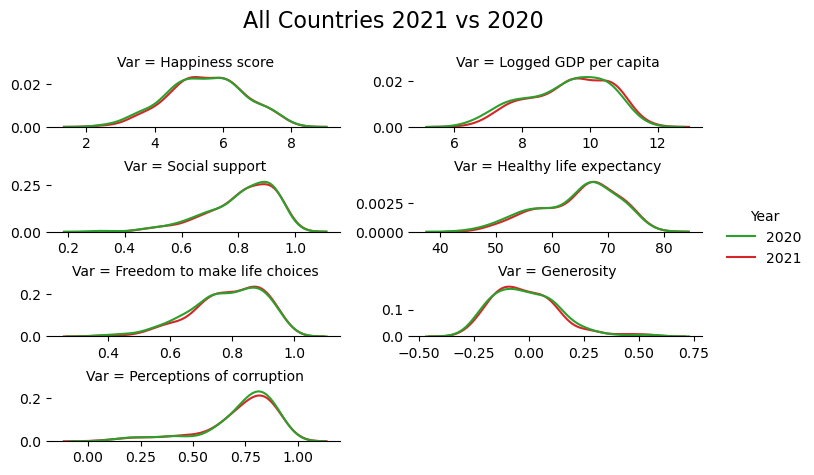

In [ ]:
g = sns.displot(data=dfM, x='Value', col='Var', hue='Year', kind='kde',
                col_wrap=2,
                palette=sns.color_palette()[2:4],
                height=1.25, aspect=3,
                facet_kws={'sharey': False, 'sharex': False}
               )
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('All Countries 2021 vs 2020', size=16)
g.set_axis_labels('','')
sns.despine(left=True)

<span style="color: #02d9fa">

# Credits

---

## Content created by [ApplAi](https://www.linkedin.com/company/applaiasu/mycompany/)


**Directed By:**
- Director of Machine Learning and Training Department: [Eslam Shouman](https://www.linkedin.com/in/eslam-shouman-0958091b4/)

**Team leader:**
- [Hesham Yehia](https://www.linkedin.com/in/hesham-yehia/)

**Technical Team:**
- [Sama Elgharabawy](http://www.linkedin.com/in/sama-gharabawy-2aa19b217)
- [Heba Tarek](https://www.linkedin.com/in/heba-tarek-86643823b/)
- [Soheir Khaled](https://www.linkedin.com/in/soheir-khaled-4a2489249)
- [Baraa Gamal](https://www.linkedin.com/in/baraa-gamal-69b2ab255/)

## Date of creation

- **30 April 2023**
---
</span>